In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics


In [2]:
#Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset
lead_df=pd.read_csv("/Users/Purvikas/Downloads/Leads.csv")

In [4]:
#Exploring the dataset
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_df.shape

(9240, 37)

The dataset has 9240 rows and 37 columns

In [6]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see that there are lot of null values in many columns which will need to be removed during the Data cleaning proces

<h2>Exploratory Data Analysis</h2>

<h4> Data Cleaning </h4>

Let us start the EDA process with Data Cleaning.In the given instructions it is mentioned that the "Select" values can be treated as Null. So as first step will convert all "Select" to "Null"

In [7]:
lead_df = lead_df.replace('Select', np.nan)

In [8]:
#Check the null values in all columns
(lead_df.isnull().sum()*100/len(lead_df)).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [9]:
#Dropping columns that more than 40% null values
lead_df = lead_df.drop(["How did you hear about X Education","Lead Profile","Lead Quality","Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Activity Index","Asymmetrique Profile Index"], axis=1)

In [10]:
#Checking the null values again
(lead_df.isnull().sum()*100/len(lead_df)).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

We now have all the columns with null values lower than 40%

In [11]:
#Let us pick other columns with less than 40% null values in order starting with City.
lead_df["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [12]:
#We can impute the null values with Mode, i.e., Mumbai.
lead_df["City"] = lead_df["City"].fillna(lead_df["City"].mode().iloc[0])

In [13]:
#Recheck whether the number of columns with Mumbai have increased or not.
lead_df["City"].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

There is an increase in number of columns with Mumbai

In [14]:
#Checking other columns with null values
(lead_df.isnull().sum()*100/len(lead_df)).sort_values(ascending=False)

Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
City                                              0.000000
I agree to pay the amount through cheque          0.0000

In [15]:
#Let us pick specialization now.
lead_df["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

Like in the City, there is not much difference between Mode and the other values and hence imputing with Mode will incorrectly skew the data in favour of mode. Let us create a new category called as NA for null values here. This will also help us in understanding how many people without specialization are generating leads.

In [16]:
lead_df["Specialization"]=lead_df["Specialization"].replace(np.nan,"NA")

In [17]:
#Checking other columns with null values
(lead_df.isnull().sum()*100/len(lead_df)).sort_values(ascending=False)

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
City                                              0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [18]:
#Let us now look at Tags
lead_df["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [19]:
#Imputing values with mode
lead_df["Tags"] = lead_df["Tags"].fillna(lead_df["Tags"].mode().iloc[0])

In [20]:
#Checking other columns with null values
(lead_df.isnull().sum()*100/len(lead_df)).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
City                                              0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [21]:
#Let us look into "What matters most" column
lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
#Imputing values with mode
lead_df["What matters most to you in choosing a course"] = lead_df["What matters most to you in choosing a course"].fillna(lead_df["What matters most to you in choosing a course"].mode().iloc[0])


In [23]:
#Checking other columns with null values
(lead_df.isnull().sum()*100/len(lead_df)).sort_values(ascending=False)

What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Digital Advertisement                             0.000000
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Prospect ID                                       0.000000
X Education Forums                                0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
City                                              0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [24]:
#Let us look into current occupation
lead_df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
#Imputing null values with mode
lead_df["What is your current occupation"] = lead_df["What is your current occupation"].fillna(lead_df["What is your current occupation"].mode().iloc[0])


In [26]:
#Checking other columns with null values
(lead_df.isnull().sum()*100/len(lead_df)).sort_values(ascending=False)

Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Update me on Supply Chain Content                 0.000000
X Education Forums                                0.000000
Get updates on DM Content                         0.000000
City                                              0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Newspaper                                         0.0000

In [27]:
#Let us look into Country
lead_df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [28]:
#Imputing null values with mode
lead_df["Country"] = lead_df["Country"].fillna(lead_df["Country"].mode().iloc[0])


In [29]:
#Checking other columns with null values
(lead_df.isnull().sum()*100/len(lead_df)).sort_values(ascending=False)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
Newspaper                                        0.000000
Digital Advertisement                            0.000000
Through Recommendations                          0.000000
Receive More Updates About Our Courses           0.000000
Tags                                             0.000000
Update me on Supply Chain Content                0.000000
Newspaper Article                                0.000000
Get updates on DM Content                        0.000000
City                                             0.000000
I agree to pay the amount through cheque         0.000000
A free copy of Mastering The Interview           0.000000
X Education Forums                               0.000000
Search        

Now we have very less null values for remaining columns, so instead of going for making changes in columns, we can drop these rows, as it will not have a significant impact

In [30]:
lead_df.dropna(inplace=True)

In [31]:
#Checking other columns with null values
(lead_df.isnull().sum()*100/len(lead_df)).sort_values(ascending=False)

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

We have now sorted all null values

<h4> Data Quality check </h4>

In [32]:
#We can now check for some Data Quality issues like spell check etc. for Object Type columns
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [33]:
lead_df["Lead Origin"].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

This looks good.

In [34]:
lead_df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [35]:
#Replacing google with Google
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')

In [36]:
lead_df["Lead Source"].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

Looks Good now

In [37]:
lead_df["Country"].value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

Looks Good

In [38]:
lead_df["Last Activity"].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Looks Good

In [39]:
lead_df["Specialization"].value_counts()

NA                                   3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Looks good

In [40]:
lead_df["What is your current occupation"].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

Looks good

In [41]:
lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Looks good

The remaining columns with data type Object are all Yes and No can be converted to 1s and 0s later on.

<h3> Univariate Analysis </h3>

In [42]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

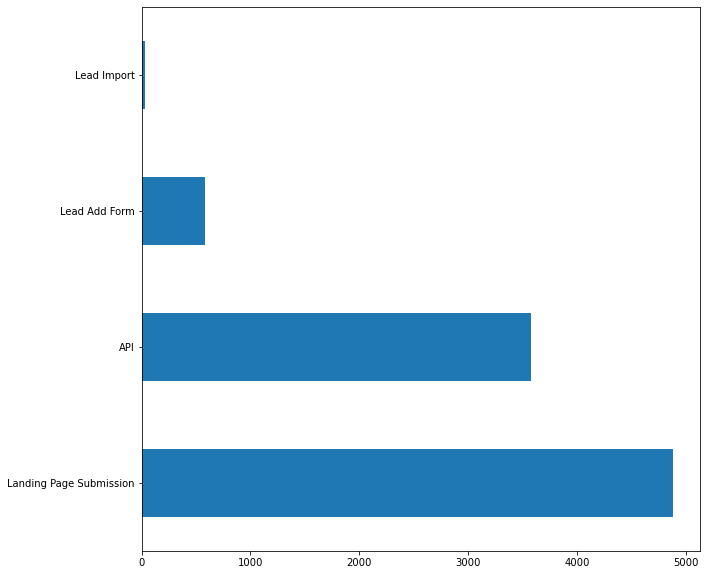

In [43]:
#Let us start with Lead Origin
plt.figure(figsize=(10,10))
lead_df["Lead Origin"].value_counts().plot(kind="barh")
plt.show()

Maximum leads are coming from direct landing page, followed by external APIs.

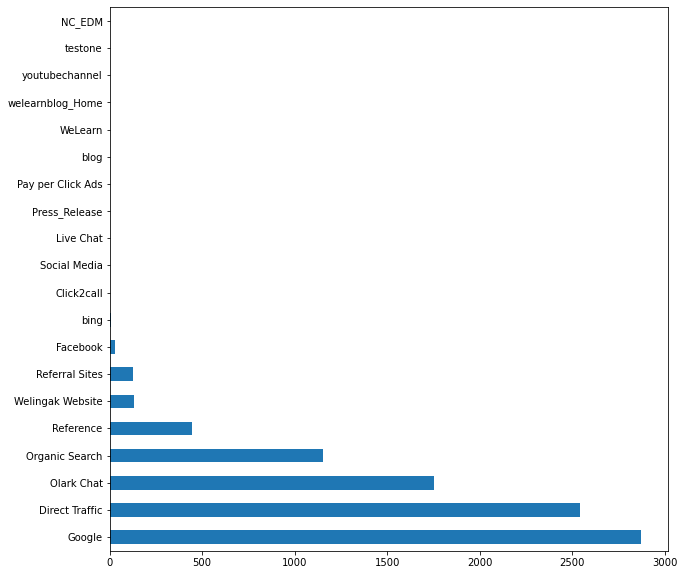

In [44]:
#Let us look at Lead Source
plt.figure(figsize=(10,10))
lead_df["Lead Source"].value_counts().plot(kind="barh")
plt.show()

Maximum leads are generated by Google followed by Direct traffic to website

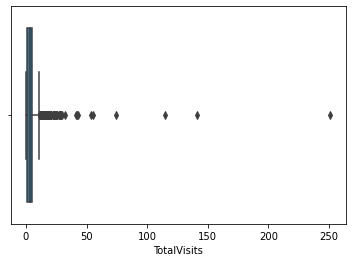

In [45]:
#Let us look at Total Visits, since this is an int value, we will use the Boxplot
sns.boxplot(lead_df["TotalVisits"])
plt.show()

In [46]:
#We need to manage the outliers here. Let us consider dropping values outside 95 percentile
np.percentile(lead_df["TotalVisits"],95)

10.0

In [47]:
#Dropping values that are more than 10
outlier_index = lead_df[lead_df["TotalVisits"]>10].index
lead_df.drop(outlier_index, inplace=True)

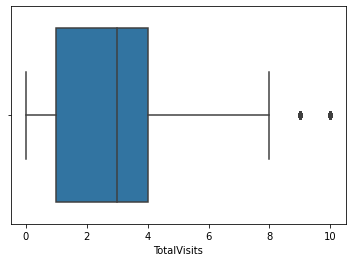

In [48]:
#plot again
sns.boxplot(lead_df["TotalVisits"])
plt.show()

This looks fine now, with most of the outliers dropped.

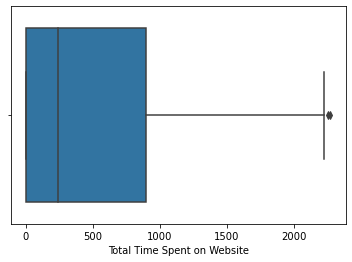

In [49]:
#Let us check time spent on website
sns.boxplot(lead_df["Total Time Spent on Website"])
plt.show()

In [50]:
#We need to manage the outliers here. Let us consider dropping values outside 95 percentile
np.percentile(lead_df["Total Time Spent on Website"],95)

1551.0

In [51]:
#Dropping values that are more than 1551
outlier_index = lead_df[lead_df["Total Time Spent on Website"]>1551].index
lead_df.drop(outlier_index, inplace=True)

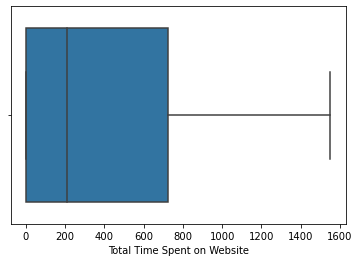

In [52]:
#Let us check time spent on website again
sns.boxplot(lead_df["Total Time Spent on Website"])
plt.show()

No outliers now

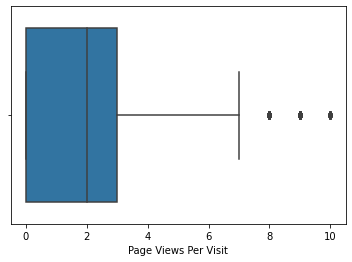

In [53]:
#Checking page views per visit
sns.boxplot(lead_df["Page Views Per Visit"])
plt.show()

In [54]:
#We need to manage the outliers here. Let us consider dropping values outside 95 percentile
np.percentile(lead_df["Page Views Per Visit"],95)

6.0

In [55]:
#Dropping values that are more than 1551
outlier_index = lead_df[lead_df["Page Views Per Visit"]>6].index
lead_df.drop(outlier_index, inplace=True)

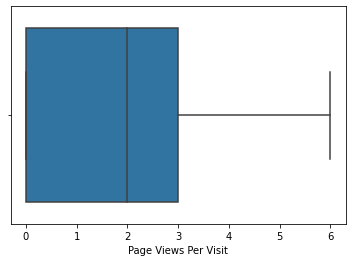

In [56]:
#Checking page views per visit again
sns.boxplot(lead_df["Page Views Per Visit"])
plt.show()

Looks good now

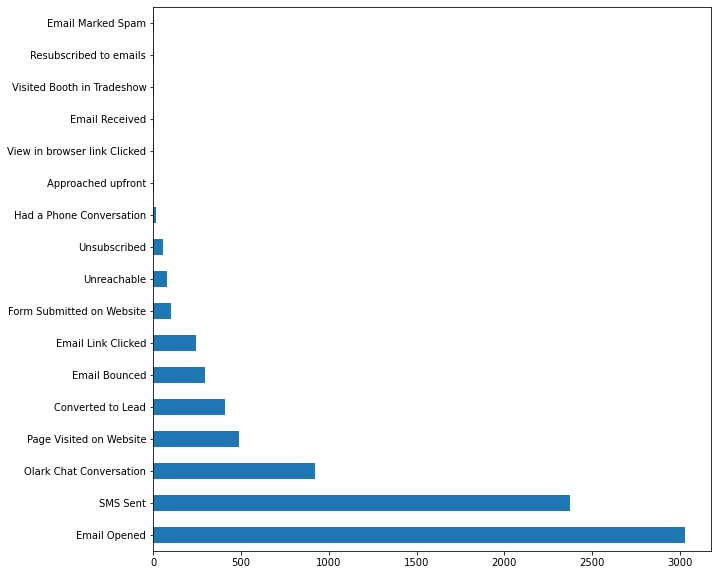

In [57]:
#let us pick Last Activity now
plt.figure(figsize=(10,10))
lead_df["Last Activity"].value_counts().plot(kind="barh")
plt.show()

Most of the cusomters open emails, but do not link on the email link, indicating the email should be made more interesting

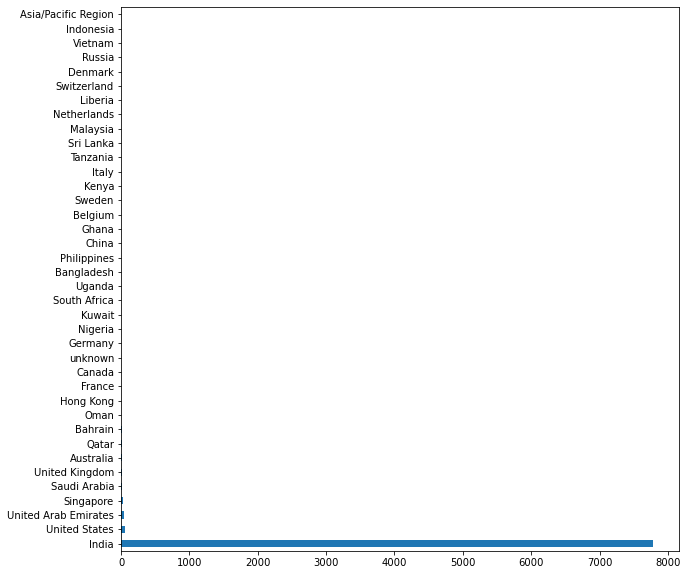

In [58]:
# Let us look at Country now
plt.figure(figsize=(10,10))
lead_df["Country"].value_counts().plot(kind="barh")
plt.show()

Most leads are from India

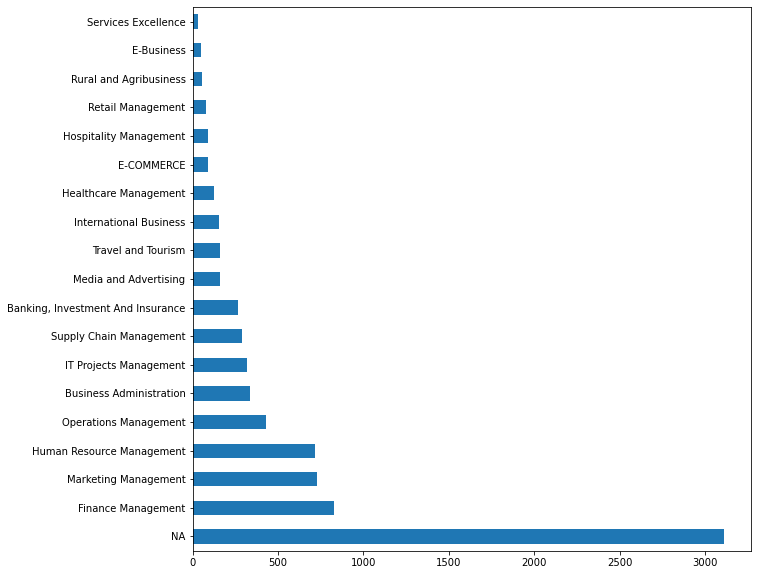

In [59]:
# Next is specialization
plt.figure(figsize=(10,10))
lead_df["Specialization"].value_counts().plot(kind="barh")
plt.show()

Majority of leads are from people who do not have any specialization

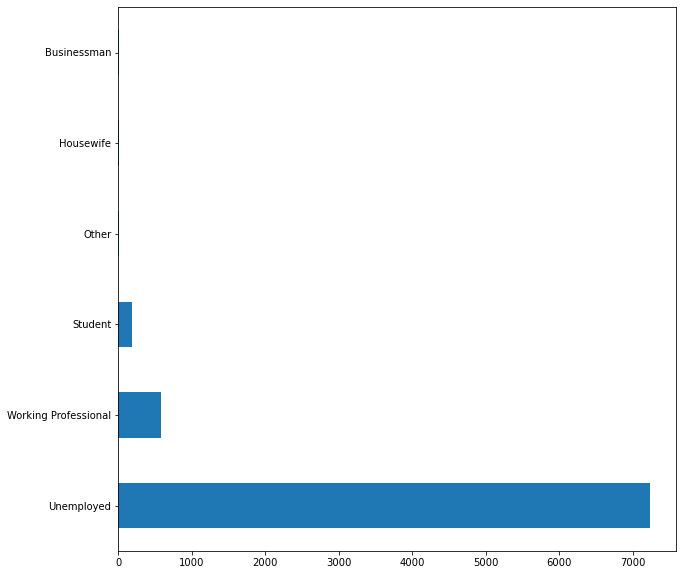

In [60]:
#Next is occupation
plt.figure(figsize=(10,10))
lead_df["What is your current occupation"].value_counts().plot(kind="barh")
plt.show()

Most of leads are generated from people who are unemployed

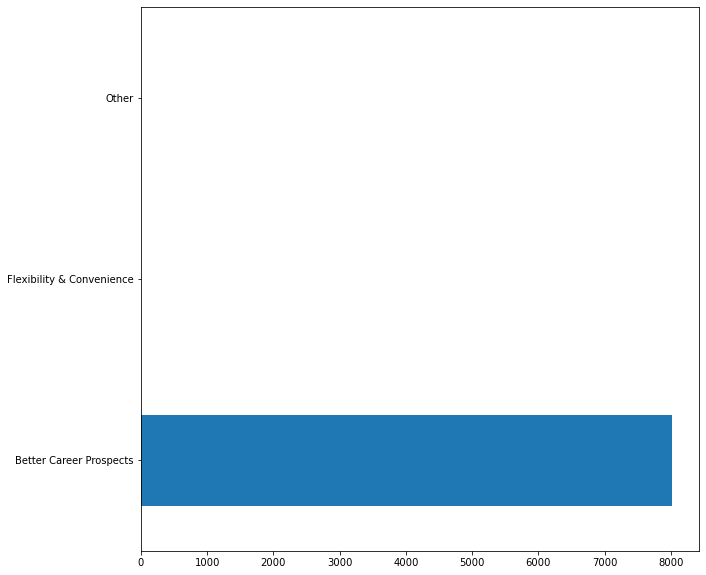

In [61]:
#What matters
plt.figure(figsize=(10,10))
lead_df["What matters most to you in choosing a course"].value_counts().plot(kind="barh")
plt.show()


Most of the leads are generated by people who are looking for better carrer prospects

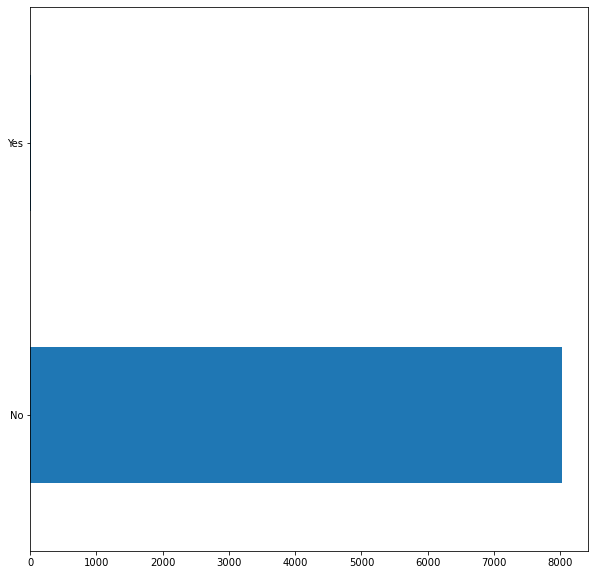

In [62]:
#Generate through Search
plt.figure(figsize=(10,10))
lead_df["Search"].value_counts().plot(kind="barh")
plt.show()

Most are No. We cannot draw any inference from Search column

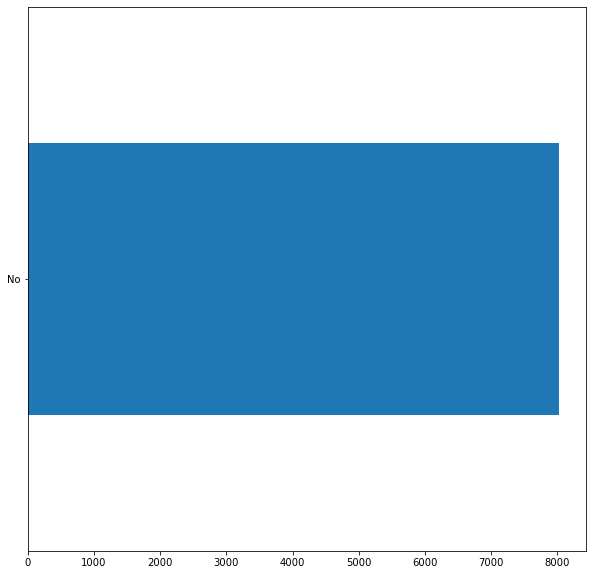

In [63]:
#Generate through Magazine
plt.figure(figsize=(10,10))
lead_df["Magazine"].value_counts().plot(kind="barh")
plt.show()


All are No. No inference can be drawn from this column

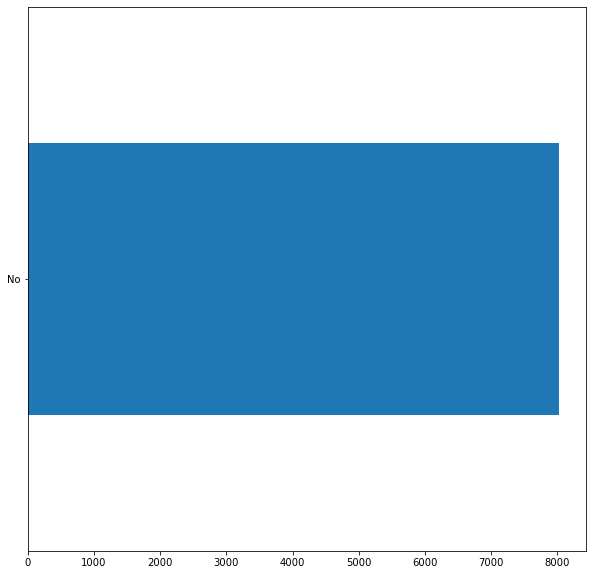

In [64]:
#Generate through Newspaper Article
plt.figure(figsize=(10,10))
lead_df["Newspaper Article"].value_counts().plot(kind="barh")
plt.show()

All are No. No inference can be drawn from this column

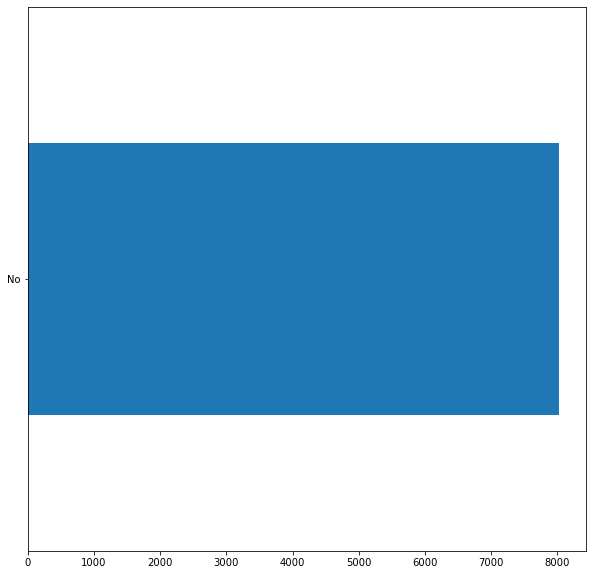

In [65]:
#Generate through X Education Forums
plt.figure(figsize=(10,10))
lead_df["X Education Forums"].value_counts().plot(kind="barh")
plt.show()

All are No. No inference can be drawn from this column

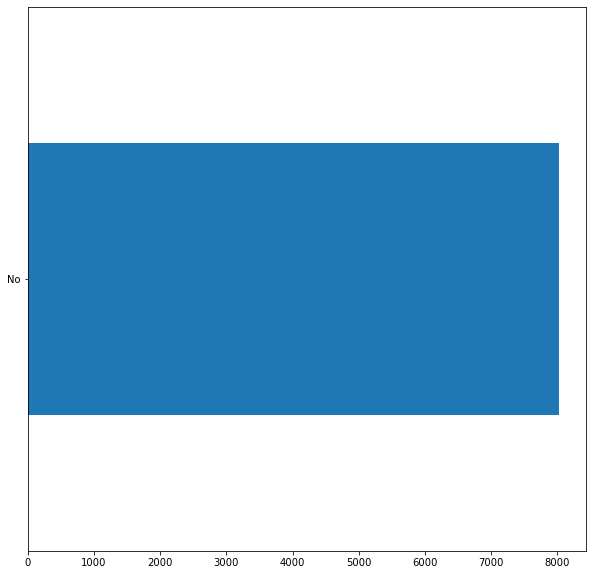

In [66]:
#Generate through Newspaper
plt.figure(figsize=(10,10))
lead_df["Newspaper"].value_counts().plot(kind="barh")
plt.show()

All are No. No inference can be drawn from this column

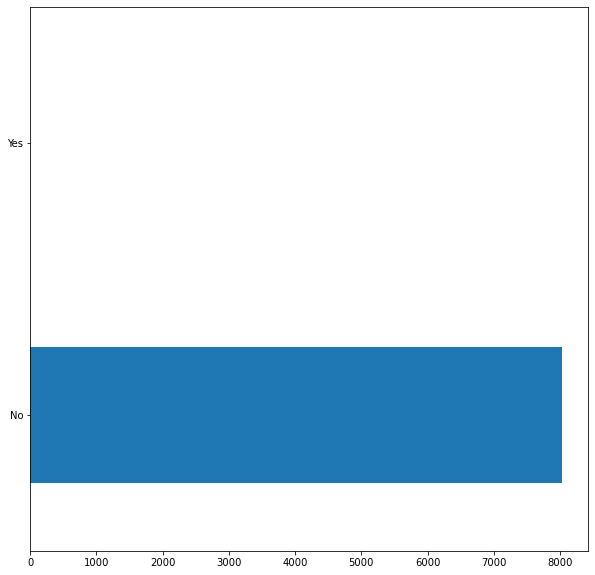

In [67]:
#Generate through Digital Advertisement
plt.figure(figsize=(10,10))
lead_df["Digital Advertisement"].value_counts().plot(kind="barh")
plt.show()

Majority are No. No inference can be drawn.

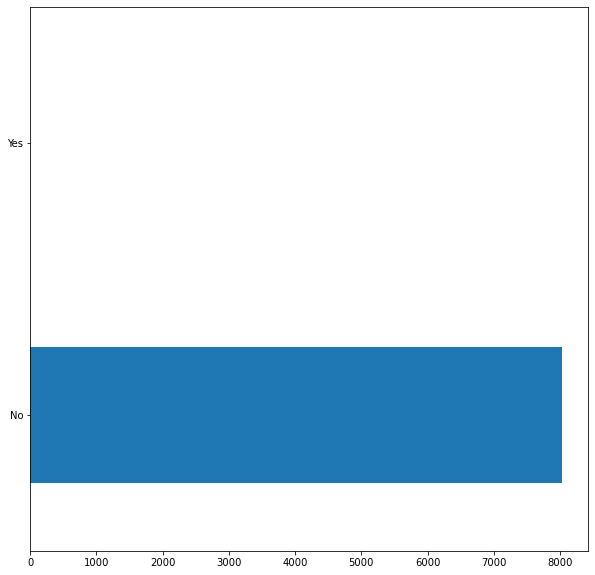

In [68]:
#Generate  Through Recommendations
plt.figure(figsize=(10,10))
lead_df["Through Recommendations"].value_counts().plot(kind="barh")
plt.show()

Majority are No. No inference can be drawn.

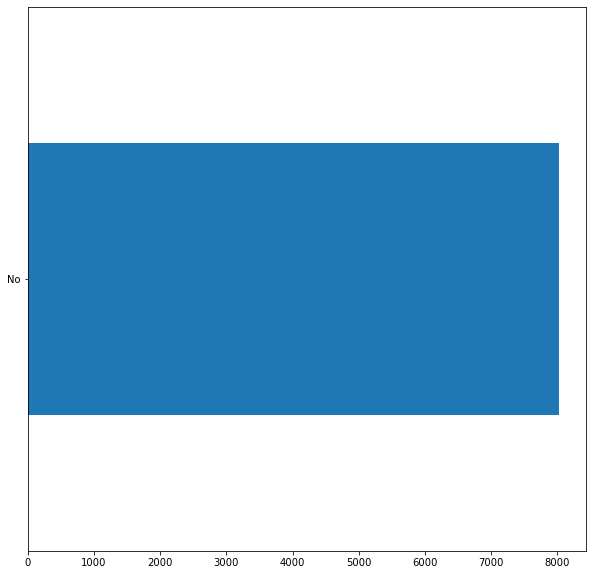

In [69]:
#Look at people who are asked to receive updates
plt.figure(figsize=(10,10))
lead_df["Receive More Updates About Our Courses"].value_counts().plot(kind="barh")
plt.show()

No inference can be drawn

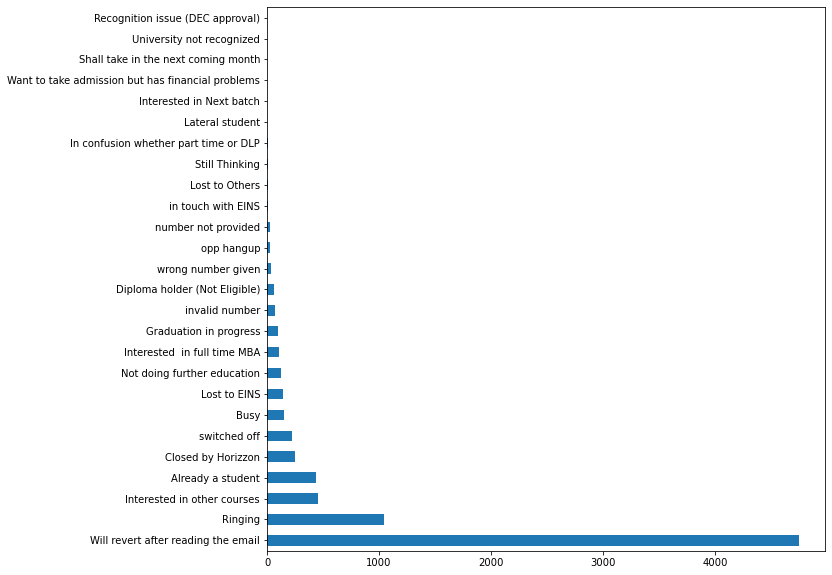

In [70]:
#Look at Tags now
plt.figure(figsize=(10,10))
lead_df["Tags"].value_counts().plot(kind="barh")
plt.show()

Most of the leads upon contacted have agreed to revert after reading the mail. This seems to be a column that is manually updated

In [71]:
#Tags do not seem to say anything about behaviour of data, this looks more like entires for reference. We can drop this.
lead_df=lead_df.drop(["Tags"],axis=1)

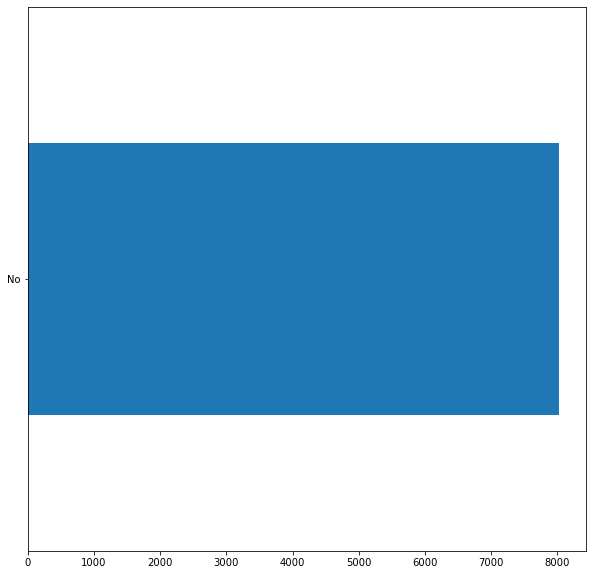

In [72]:
#People looking for Supply chain content
plt.figure(figsize=(10,10))
lead_df["Update me on Supply Chain Content"].value_counts().plot(kind="barh")
plt.show()

No inference can be drawn

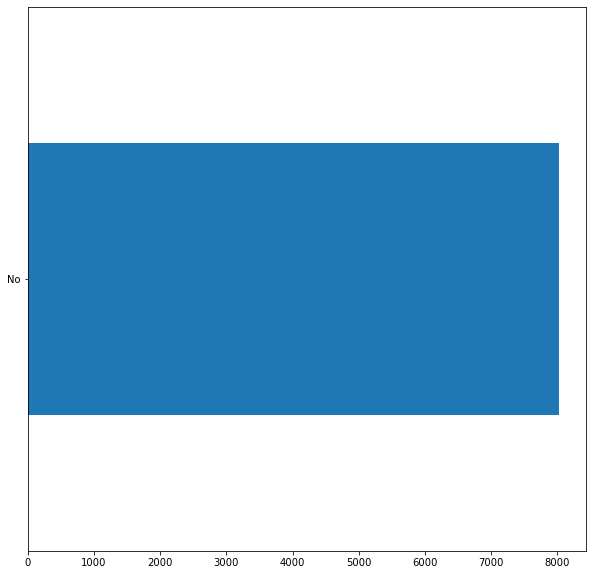

In [73]:
#People looking for DM Content
plt.figure(figsize=(10,10))
lead_df["Get updates on DM Content"].value_counts().plot(kind="barh")
plt.show()


No inference can be drawn

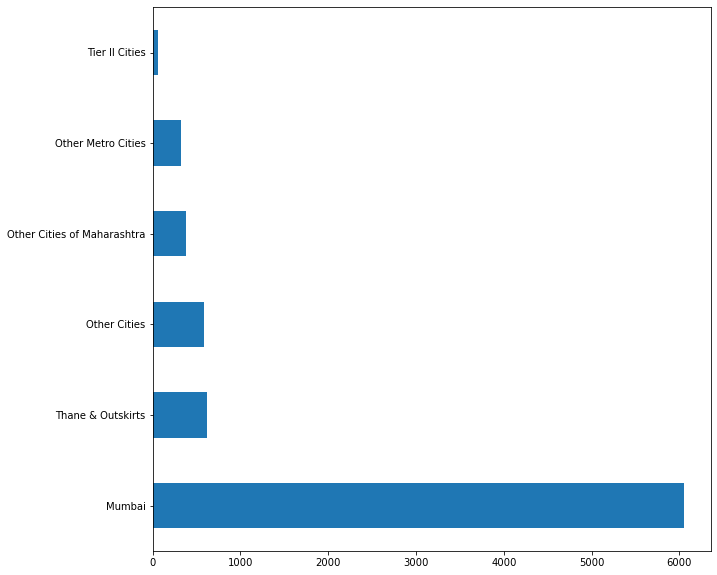

In [74]:
#Looking at the City
plt.figure(figsize=(10,10))
lead_df["City"].value_counts().plot(kind="barh")
plt.show()

Most of leads are from Mumbai. We are only tracking cities for India.

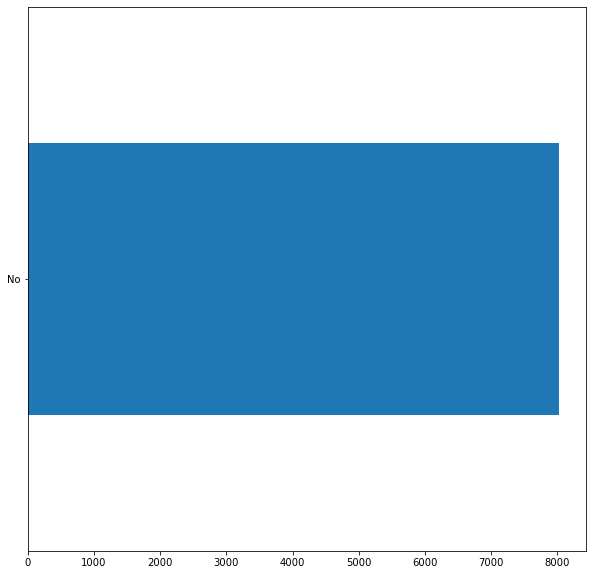

In [75]:
#People who agreed to pay through check
plt.figure(figsize=(10,10))
lead_df["I agree to pay the amount through cheque"].value_counts().plot(kind="barh")
plt.show()


No inference can be drawn from this.

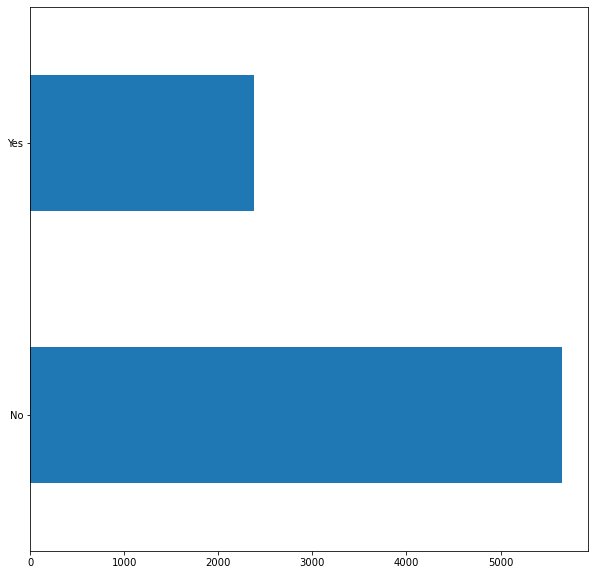

In [76]:
#People who agreed to receive free copy
plt.figure(figsize=(10,10))
lead_df["A free copy of Mastering The Interview"].value_counts().plot(kind="barh")
plt.show()

Majority of people did not agree to receive free copy on mastering interviews

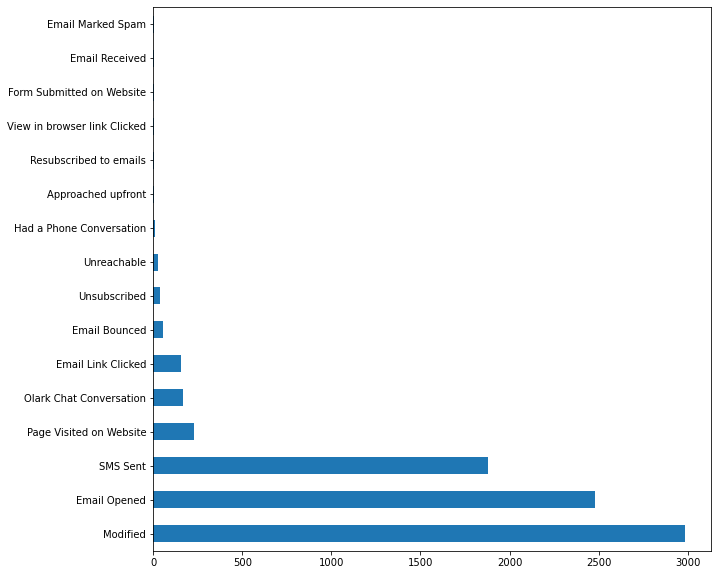

In [77]:
#Last Notable Activity
plt.figure(figsize=(10,10))
lead_df["Last Notable Activity"].value_counts().plot(kind="barh")
plt.show()

This completes the Univariate Analysis, we can see that there are lots of columns that will add any value as there is no variance and hence we can drop them before moving ahead with Bivariate Analysis

In [78]:
lead_df=lead_df.drop(["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"], axis =1)

In [79]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8027 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8027 non-null   object 
 1   Lead Number                                    8027 non-null   int64  
 2   Lead Origin                                    8027 non-null   object 
 3   Lead Source                                    8027 non-null   object 
 4   Do Not Email                                   8027 non-null   object 
 5   Do Not Call                                    8027 non-null   object 
 6   Converted                                      8027 non-null   int64  
 7   TotalVisits                                    8027 non-null   float64
 8   Total Time Spent on Website                    8027 non-null   int64  
 9   Page Views Per Visit                           8027 

<h3> Bivariate Analysis </h3>

Let us perform Bivariate Analysis now against the Target Variable "Converted"

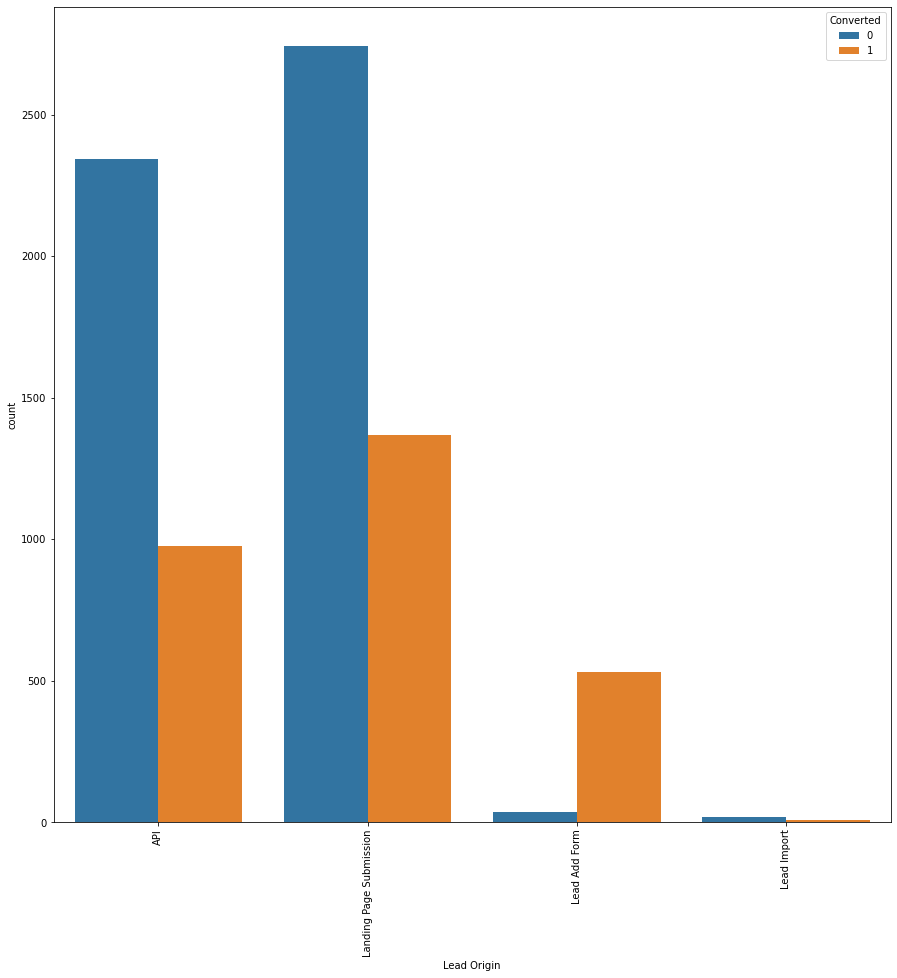

In [80]:
#Lead Origin
plt.figure(figsize=(15,15))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

There is a high conversion ratio when the Lead comes through Add Form. Others are consistent with overall average

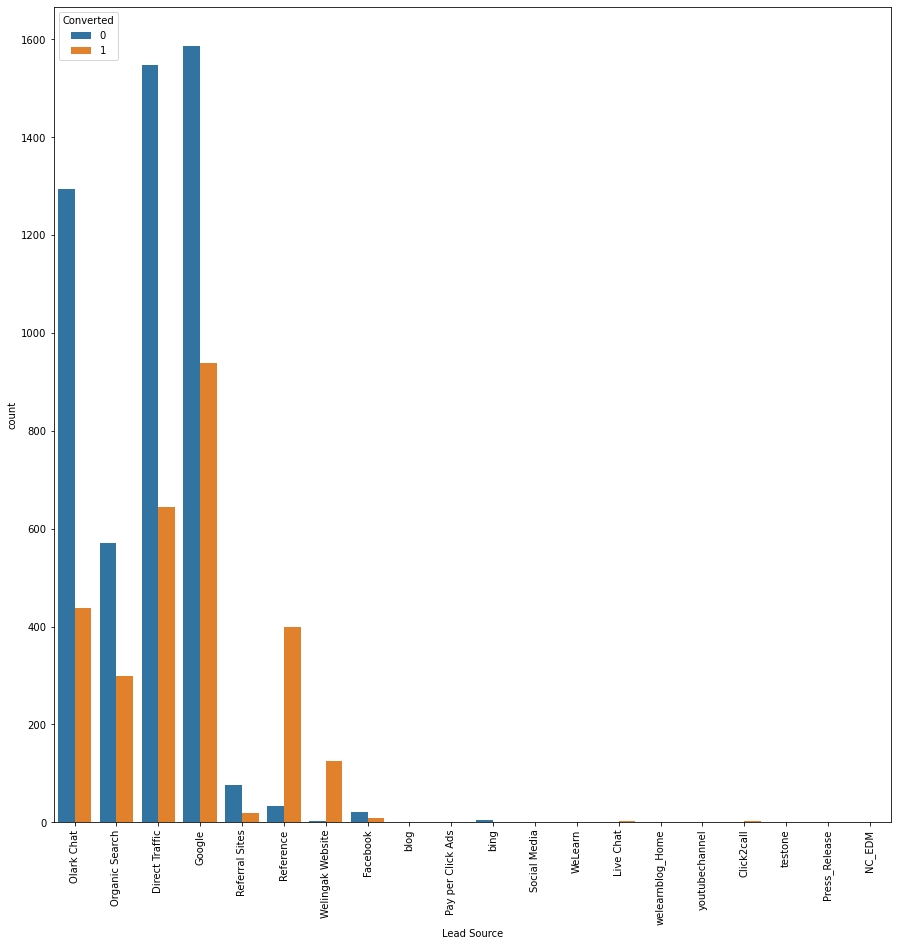

In [81]:
#Lead Source
plt.figure(figsize=(15,15))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

Reference has high conversation rates. There is high conversaion rates from Welingak Website. Google also has high conversion rate as compared to average and considerable volume as well

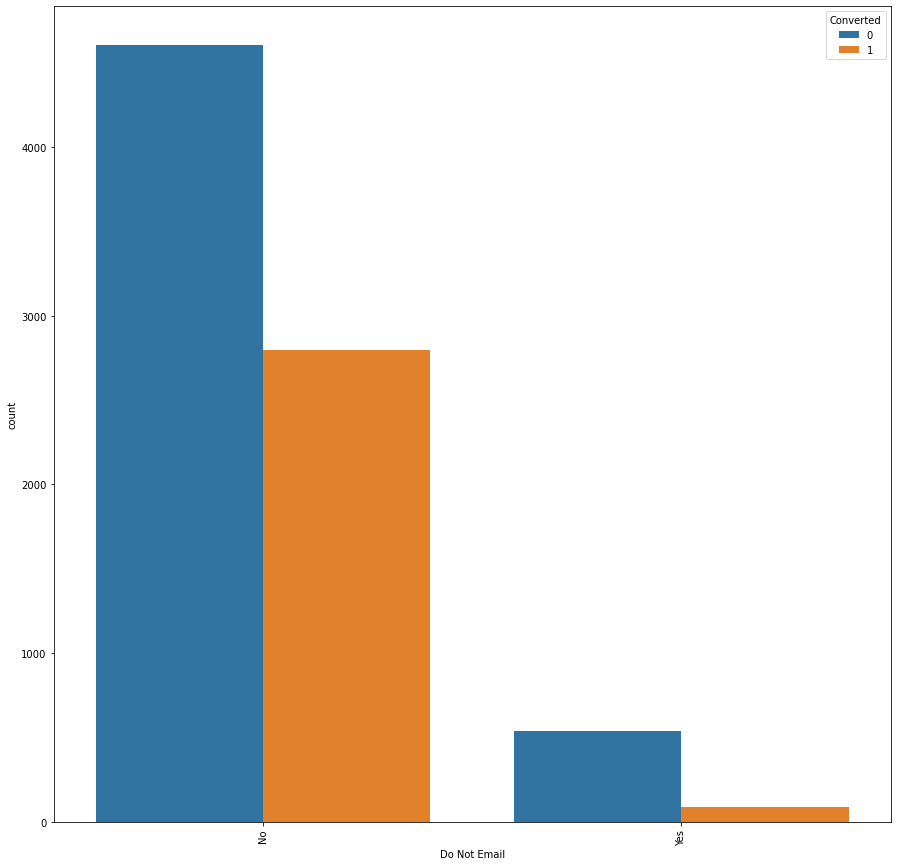

In [82]:
# Do Not Email
plt.figure(figsize=(15,15))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

No specific inferene can be drawn here as most value are no. We will drop this column

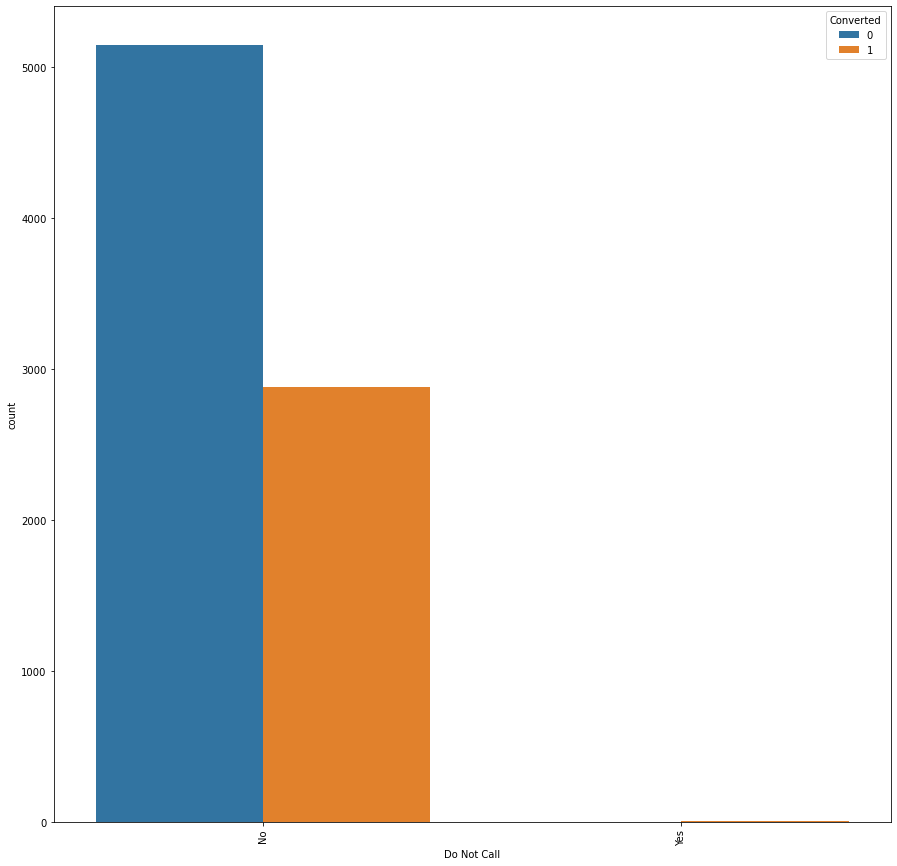

In [83]:
#Do not call
plt.figure(figsize=(15,15))
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

No inference can be drawn

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

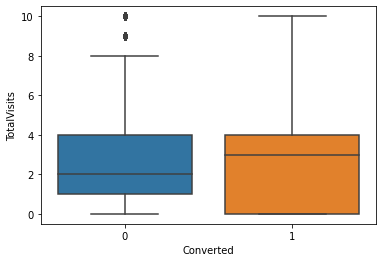

In [84]:
#Let us see how conversion rate varies with Total Visits
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)

Overall median for Total Visits is slightly higher for Converted = Yes

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

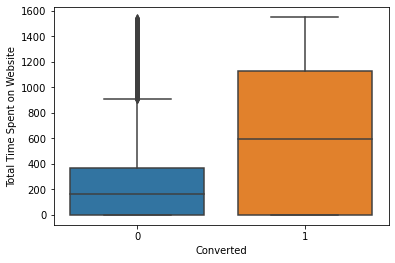

In [85]:
#Let us see how conversion rate varies with Total Time Spent on Website
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)

Median for Total time spent is much higher for Converted = "Yes", indicating that people who spend more time are likely to be converted

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

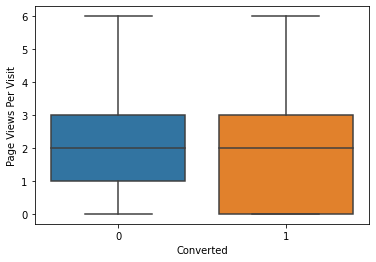

In [86]:
# let us what is the trend with Page Views
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)

Both medians seem to be same

In [87]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8027 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8027 non-null   object 
 1   Lead Number                                    8027 non-null   int64  
 2   Lead Origin                                    8027 non-null   object 
 3   Lead Source                                    8027 non-null   object 
 4   Do Not Email                                   8027 non-null   object 
 5   Do Not Call                                    8027 non-null   object 
 6   Converted                                      8027 non-null   int64  
 7   TotalVisits                                    8027 non-null   float64
 8   Total Time Spent on Website                    8027 non-null   int64  
 9   Page Views Per Visit                           8027 

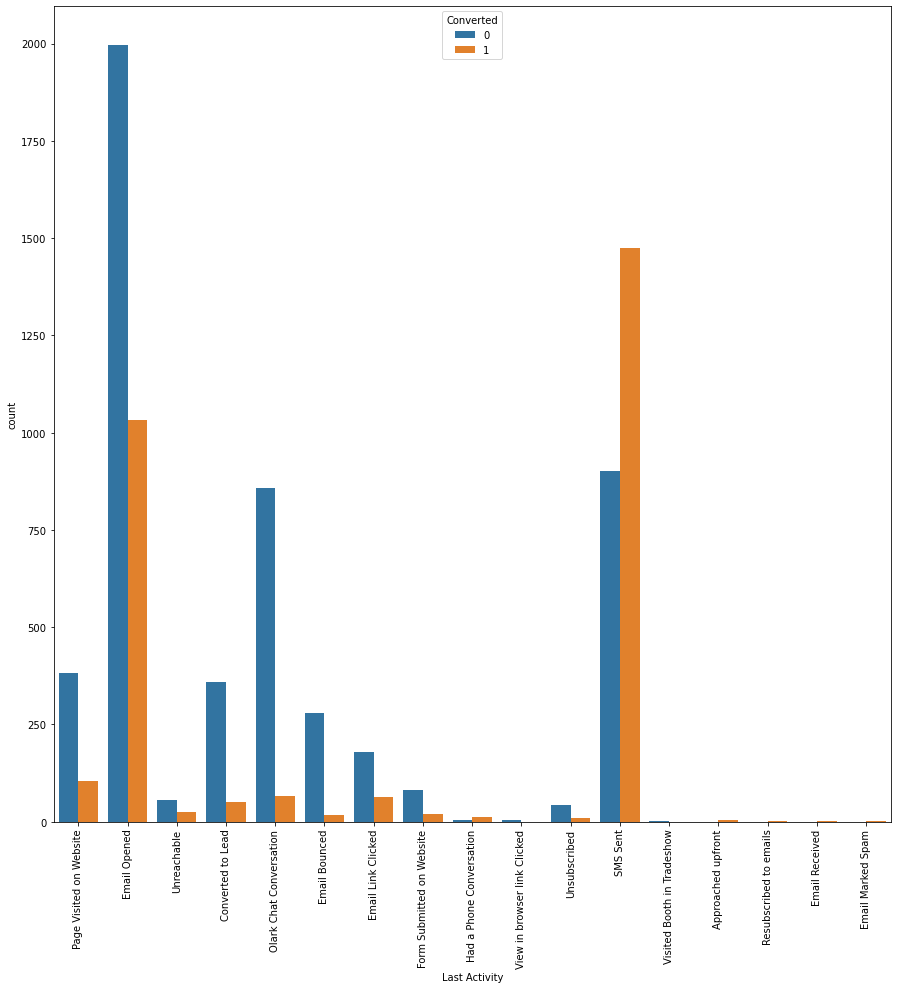

In [88]:
#Last Activity
plt.figure(figsize=(15,15))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

Conversion rate is much higher for people contacted through SMS

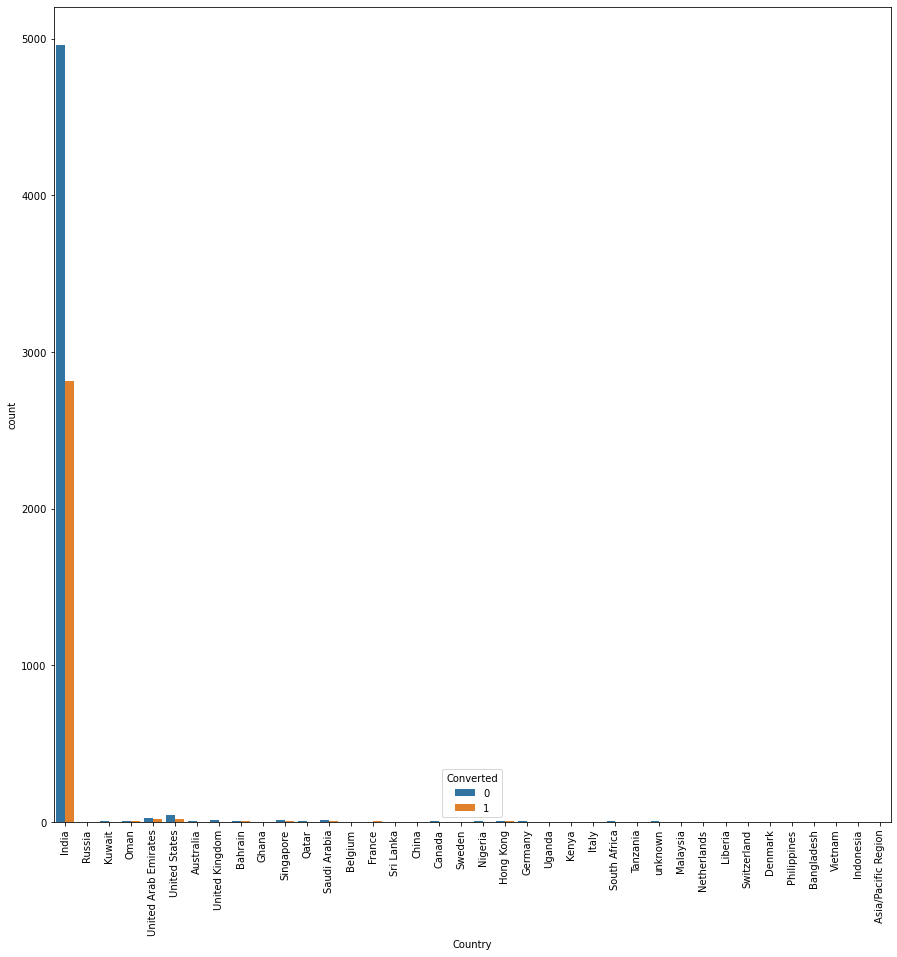

In [89]:
#Country
plt.figure(figsize=(15,15))
sns.countplot(x = "Country", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

Most leads are generated from India and India has overall high conversion rate

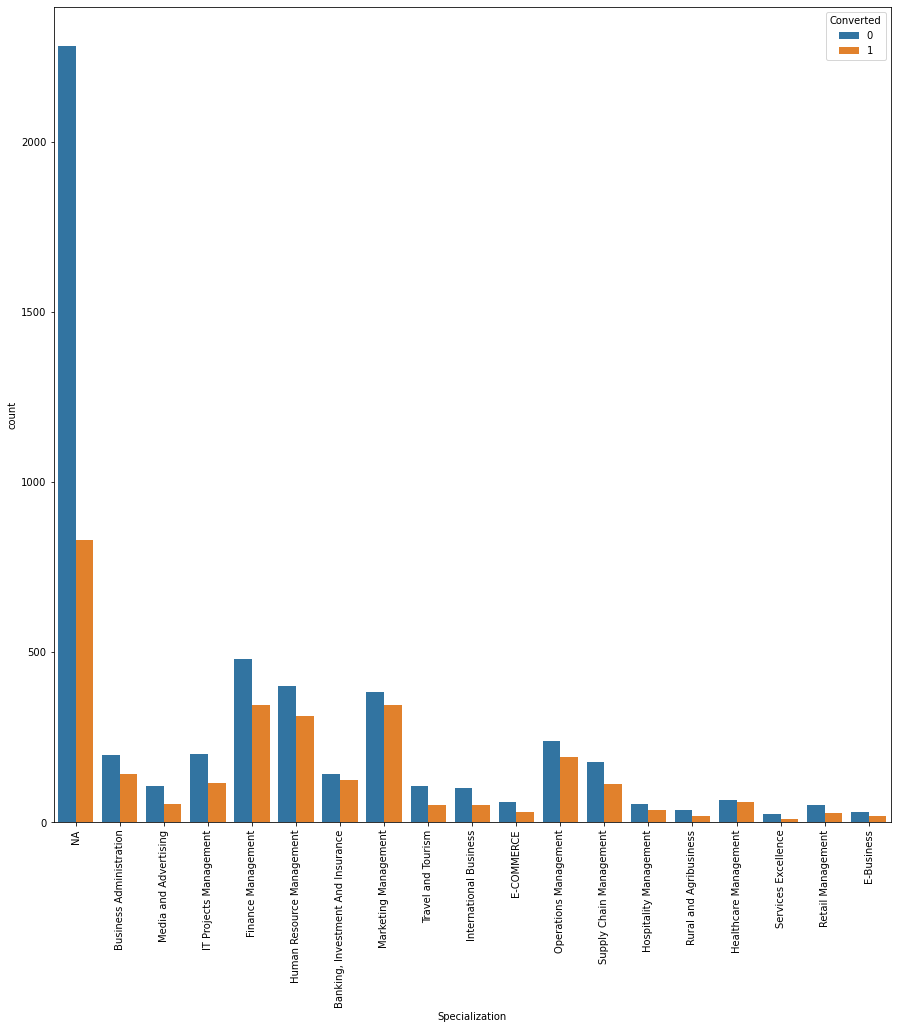

In [90]:
#Specialization
plt.figure(figsize=(15,15))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

People with non-specialized skills are higher in number, but has low conversion rate

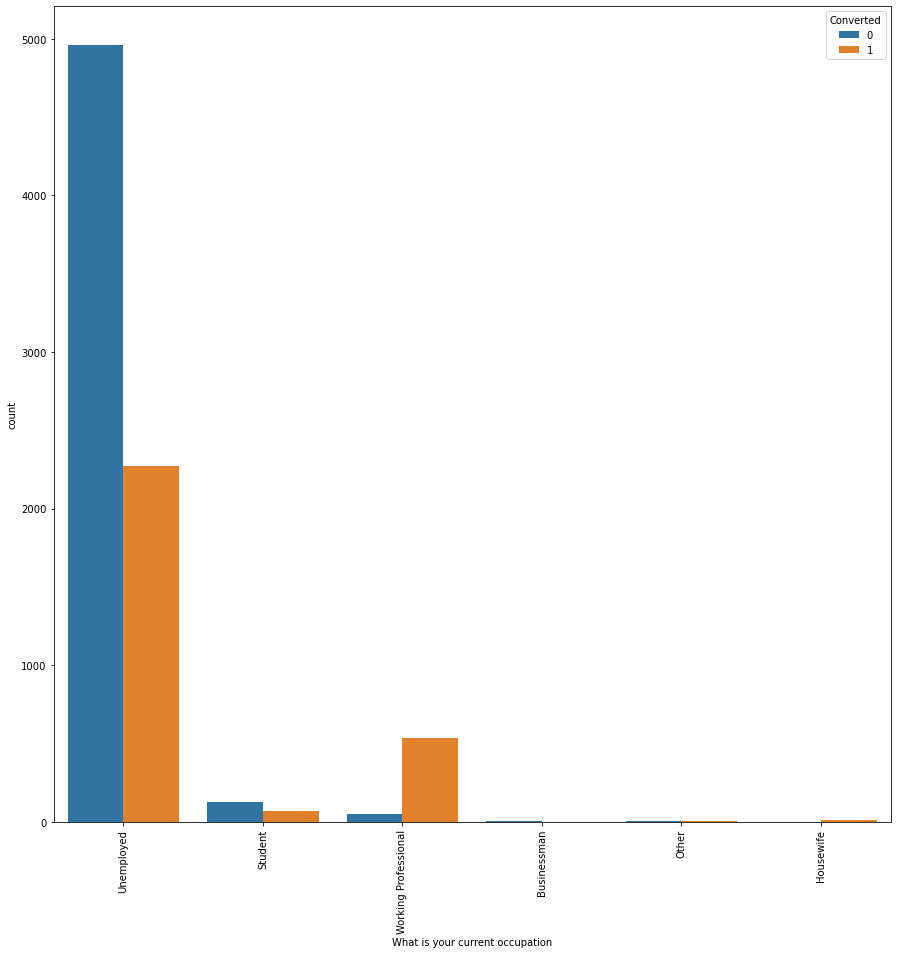

In [91]:
#What is your current occupation
plt.figure(figsize=(15,15))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

Working professionals have high conversion rate.

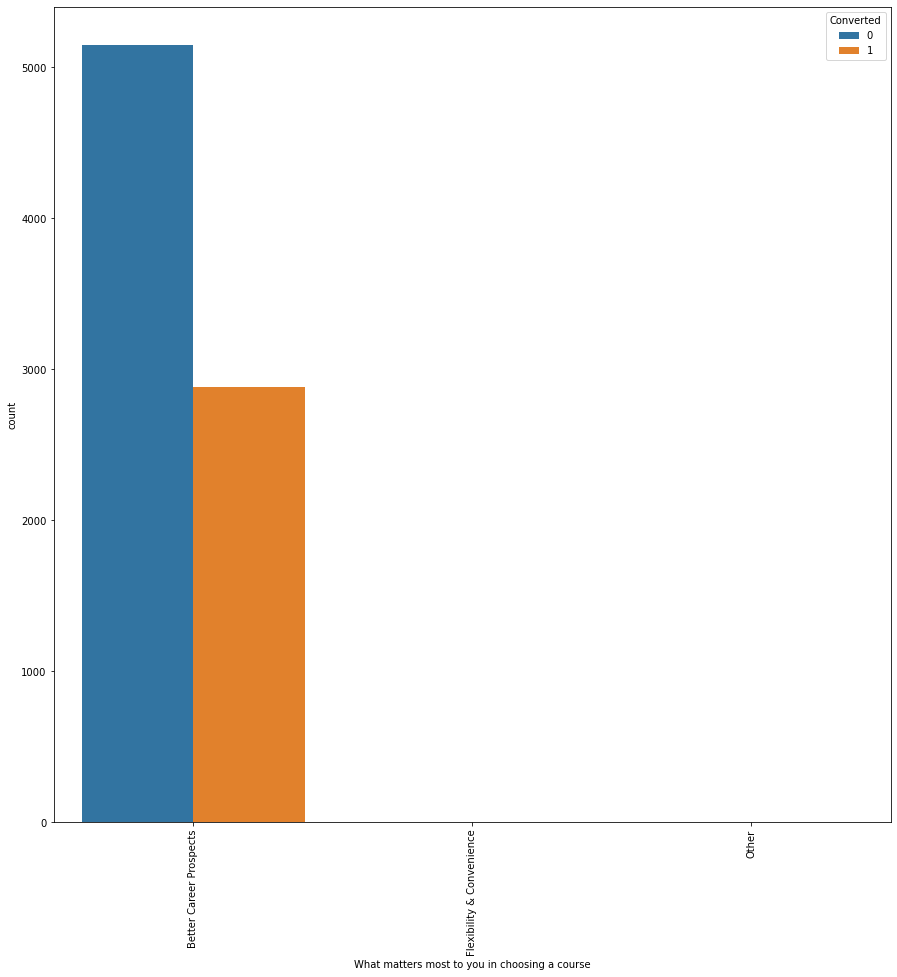

In [92]:
#What matters most to you in choosing a course
plt.figure(figsize=(15,15))
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

Does not show any particular trend

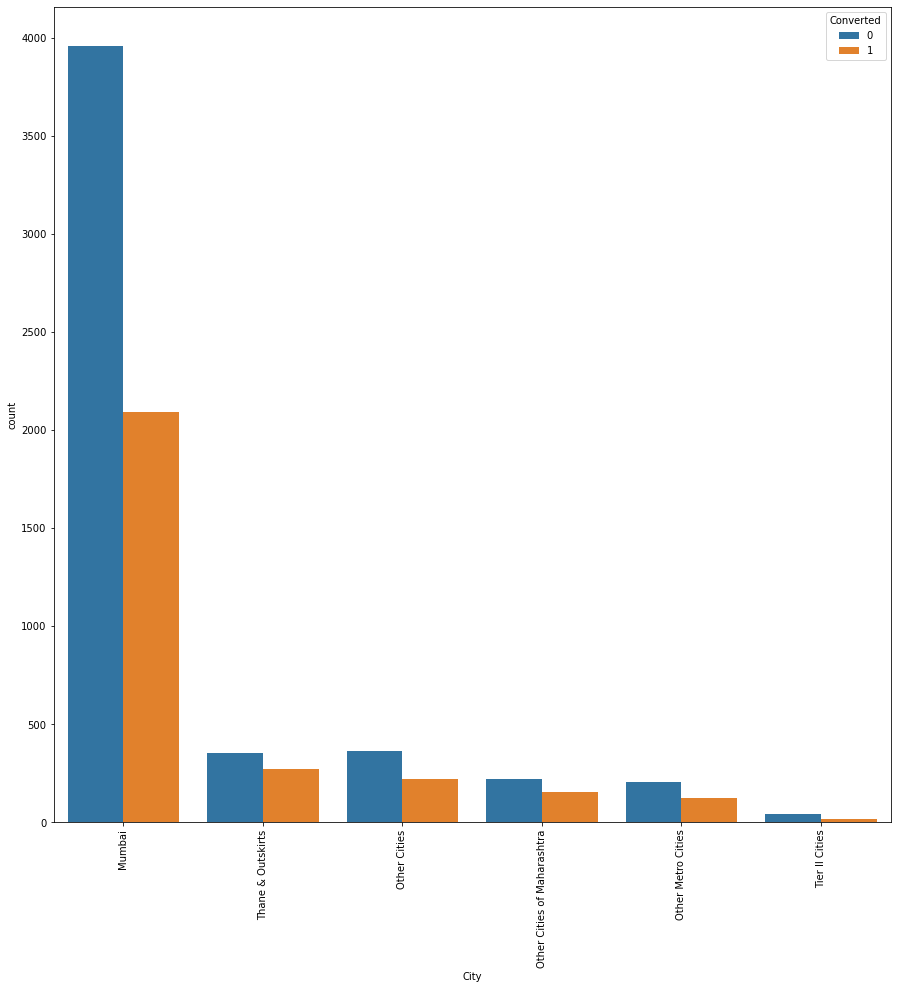

In [93]:
#City
plt.figure(figsize=(15,15))
sns.countplot(x = "City", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

No clear trend, but cities other than Mumbai seem to have better conversion ratio

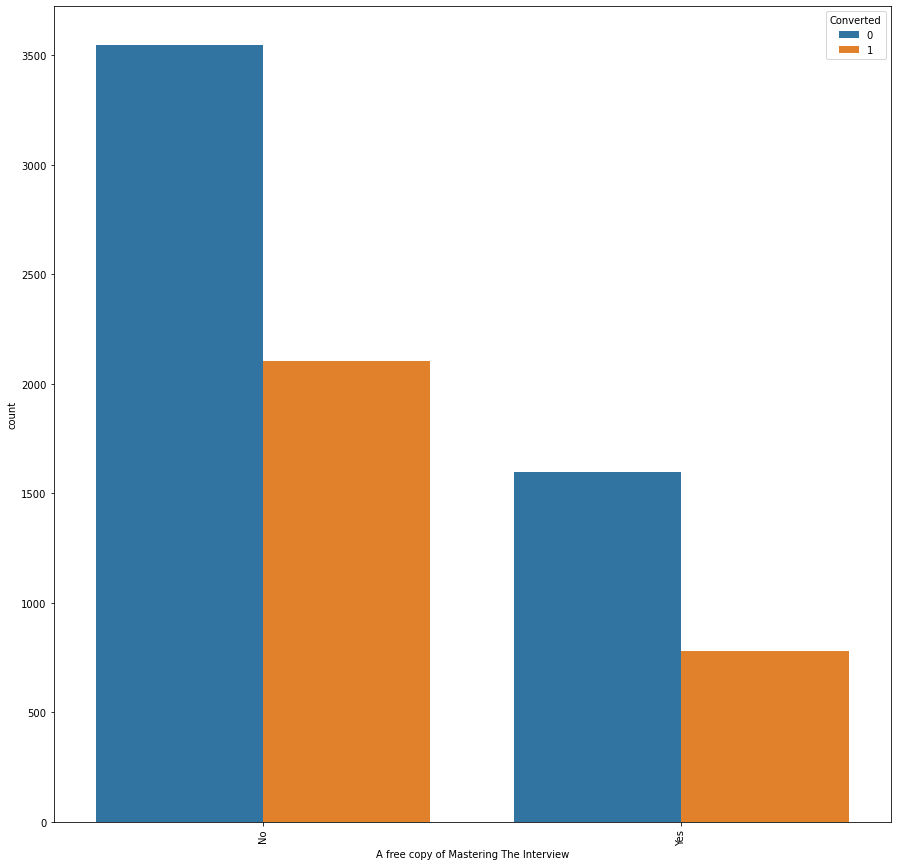

In [94]:
#A free copy of Mastering The Interview 
plt.figure(figsize=(15,15))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

No trend can be identified.

<h2> Model Building </h2>

Let us start the model building process with Data Preparation

<h4> Data Preparation </h4>

we have few columns that have binary values Yes and No, let us find them out and convert them to zero and one.


In [95]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8027 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8027 non-null   object 
 1   Lead Number                                    8027 non-null   int64  
 2   Lead Origin                                    8027 non-null   object 
 3   Lead Source                                    8027 non-null   object 
 4   Do Not Email                                   8027 non-null   object 
 5   Do Not Call                                    8027 non-null   object 
 6   Converted                                      8027 non-null   int64  
 7   TotalVisits                                    8027 non-null   float64
 8   Total Time Spent on Website                    8027 non-null   int64  
 9   Page Views Per Visit                           8027 

In [96]:
#Columns with Yes and No are: Do Not Email, Do Not Call, A free copy of Mastering the Interview. We will convert them
#to No: Zero and Yes: One
lead_df["Do Not Email"]=lead_df["Do Not Email"].map({'Yes': 1, 'No': 0})
lead_df["Do Not Call"]=lead_df["Do Not Call"].map({'Yes': 1, 'No': 0})
lead_df["A free copy of Mastering The Interview"]=lead_df["A free copy of Mastering The Interview"].map({'Yes': 1, 'No': 0})

In [97]:
#check the results
lead_df["Do Not Email"].value_counts()

0    7401
1     626
Name: Do Not Email, dtype: int64

In [98]:
lead_df["Do Not Call"].value_counts()

0    8025
1       2
Name: Do Not Call, dtype: int64

In [99]:
lead_df["A free copy of Mastering The Interview"].value_counts()

0    5649
1    2378
Name: A free copy of Mastering The Interview, dtype: int64

We have made the required conversions

Now we need to create dummy variables for non-binary categorical variables. These variables are: 
1. Lead Origin
2. Lead Source
3. Last Activity
4. Country
5. Specialization
6. What is current occupation
7. What matters most to you in choosing a course
8. City
9. Last notable activity


In [100]:
lead_dummies = pd.get_dummies(lead_df[["Lead Origin","Lead Source","Last Activity","Country","Specialization","What is your current occupation","What matters most to you in choosing a course","City","Last Notable Activity"]], drop_first=True)

In [101]:
#Check the results
lead_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [102]:
#Next step is to merge the dummy variables with the main data frame and drop the original variables
lead_df = pd.concat([lead_df,lead_dummies], axis =1)

In [103]:
#Check the results
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


In [104]:
#Now let us drop the original columns
lead_df=lead_df.drop(["Lead Origin","Lead Source","Last Activity","Country","Specialization","What is your current occupation","What matters most to you in choosing a course","City","Last Notable Activity"],axis =1)

In [105]:
#Check the results
lead_df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [106]:
#Before moving ahead we can drop the  Lead Number column. We will not drop Prospect ID here, as we need to assign a score to each row.
lead_df=lead_df.drop(["Lead Number"],axis=1)

In [107]:
lead_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


<h4> Splitting data in train and test </h4>

In [108]:
#Take the target variable out
X=lead_df.drop(["Prospect ID",'Converted'],axis=1)

In [109]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [110]:
#Put target variable to Y
y = lead_df["Converted"]

In [111]:
#Checking
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [112]:
#Splitting the data taking 70% as train data and 30% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [113]:
#Scale the numerical variables. Numerical variabkles are: TotalVisits, Total Time Spent and Page Views per visit
scaler = StandardScaler()
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [114]:
#Check the results
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2626,0,0,-1.158807,-0.860855,-1.229836,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2973,0,0,0.563804,0.097800,1.185400,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5392,1,0,-0.728154,-0.109591,-0.626027,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8344,0,0,-1.158807,-0.860855,-1.229836,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1763,0,0,0.133151,-0.287355,0.581591,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<h3> Model Building using RFE</h3>

In [115]:
log_reg=LogisticRegression()
#Selecting 20 variables
rfe=RFE(log_reg,20)
rfe=rfe.fit(X_train, y_train)

In [116]:
#Viewing columns selected by RFE
rfe_cols=X_train.columns[rfe.support_]

In [190]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 78),
 ('TotalVisits', False, 46),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 47),
 ('A free copy of Mastering The Interview', False, 53),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 96),
 ('Lead Source_Direct Traffic', False, 21),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 49),
 ('Lead Source_NC_EDM', False, 103),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 62),
 ('Lead Source_Press_Release', False, 87),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Social Media', False, 10),
 ('Lead Source_WeLearn', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 55),
 ('Lead Source_blog', False, 33),
 ('Le

In [117]:
rfe_cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Country_France',
       'Country_Saudi Arabia', 'Specialization_NA',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [118]:
#Let us build the model now using these columns
X_train_sm = sm.add_constant(X_train[rfe_cols])

#Create model

lr = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fit
lr_model = lr.fit()

#Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5597
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2190.5
Date:                Mon, 17 Apr 2023   Deviance:                       4381.1
Time:                        21:16:42   Pearson chi2:                 5.77e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0626      0.154      6.905      0.000       0.761       1.364
Do Not Email                                            -1.4830      0.222     -6.671      0.000      -1.919      -1.047
Total Time Spent on Website                              1.0896      0.044     24.758      0.000       1.003       1.176
Lead Origin_Landing Page Submission                     -1.1575      0.145     -8.003      0.000      -1.441      -0.874
Lead Origin_Lead Add Form                                3.5374      0.260     13.601      0.000       3.028       4.047
Lead Source_Olark Chat                                   1.2766      0.134      9.539      0.000       1.014       1.539
Lead Source_Welingak Website                             2.3452      0.766      3.063      0.002       0.844       3.846
Last Activity_Converted to Lead                         -0.9383      0.234     -4.014      0.000      -1.396      -0.480
Last Activity_Email Bounced                             -1.4592      0.453     -3.220      0.001      -2.347      -0.571
Last Activity_Form Submitted on Website                 -1.2993      0.407     -3.191      0.001      -2.097      -0.501
Last Activity_Olark Chat Conversation                   -1.8508      0.233     -7.956      0.000      -2.307      -1.395
Last Activity_Page Visited on Website                   -1.3543      0.181     -7.501      0.000      -1.708      -1.000
Country_France                                           2.8695      1.183      2.426      0.015       0.552       5.188
Country_Saudi Arabia                                    -1.8550      1.064     -1.744      0.081      -3.940       0.230
Specialization_NA                                       -1.1763      0.139     -8.486      0.000      -1.448      -0.905
What is your current occupation_Housewife               22.3341   1.19e+04      0.002      0.999   -2.33e+04    2.34e+04
What is your current occupation_Working Professional     2.7539      0.206     13.365      0.000       2.350       3.158
Last Notable Activity_Email Link Clicked                -2.0249      0.289     -7.004      0.000      -2.591      -1.458
Last Notable Activity_Email Opened                      -1.4117      0.094    -14.941      0.000      -1.597      -1.227
Last Notable Activity_Modified                          -1.5061      0.111    -13.626      0.000      -1.723      -1.289
Last Notable Activity_Olark Chat Conversation           -1.1331      0.430     -2.632      0.008      -1.977      -0.289
========================================================================================================================
"""

In [119]:
#We can drop What is your current occupation_Housewife due to high p-value
rfe_cols=rfe_cols.drop("What is your current occupation_Housewife")

In [120]:
#Let us build the model now using these columns
X_train_sm = sm.add_constant(X_train[rfe_cols])

#Create model

lr1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fit
lr1_model = lr1.fit()

#Params
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5598
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2194.3
Date:                Mon, 17 Apr 2023   Deviance:                       4388.5
Time:                        21:16:43   Pearson chi2:                 5.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0629      0.154      6.911      0.000       0.761       1.364
Do Not Email                                            -1.4835      0.222     -6.674      0.000      -1.919      -1.048
Total Time Spent on Website                              1.0875      0.044     24.737      0.000       1.001       1.174
Lead Origin_Landing Page Submission                     -1.1554      0.145     -7.994      0.000      -1.439      -0.872
Lead Origin_Lead Add Form                                3.5475      0.260     13.647      0.000       3.038       4.057
Lead Source_Olark Chat                                   1.2736      0.134      9.522      0.000       1.011       1.536
Lead Source_Welingak Website                             2.3334      0.766      3.047      0.002       0.833       3.834
Last Activity_Converted to Lead                         -0.9381      0.234     -4.015      0.000      -1.396      -0.480
Last Activity_Email Bounced                             -1.4573      0.453     -3.217      0.001      -2.345      -0.569
Last Activity_Form Submitted on Website                 -1.2995      0.407     -3.193      0.001      -2.097      -0.502
Last Activity_Olark Chat Conversation                   -1.8480      0.233     -7.945      0.000      -2.304      -1.392
Last Activity_Page Visited on Website                   -1.3537      0.180     -7.501      0.000      -1.707      -1.000
Country_France                                           2.8649      1.182      2.423      0.015       0.547       5.182
Country_Saudi Arabia                                    -1.8573      1.063     -1.747      0.081      -3.941       0.226
Specialization_NA                                       -1.1792      0.139     -8.511      0.000      -1.451      -0.908
What is your current occupation_Working Professional     2.7492      0.206     13.345      0.000       2.345       3.153
Last Notable Activity_Email Link Clicked                -2.0120      0.287     -7.005      0.000      -2.575      -1.449
Last Notable Activity_Email Opened                      -1.4049      0.094    -14.886      0.000      -1.590      -1.220
Last Notable Activity_Modified                          -1.5055      0.111    -13.624      0.000      -1.722      -1.289
Last Notable Activity_Olark Chat Conversation           -1.1319      0.430     -2.630      0.009      -1.975      -0.288
========================================================================================================================
"""

In [121]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Notable Activity_Modified,2.94
13,Specialization_NA,2.59
2,Lead Origin_Landing Page Submission,2.35
4,Lead Source_Olark Chat,2.29
9,Last Activity_Olark Chat Conversation,2.22
0,Do Not Email,1.91
16,Last Notable Activity_Email Opened,1.89
7,Last Activity_Email Bounced,1.87
3,Lead Origin_Lead Add Form,1.61
18,Last Notable Activity_Olark Chat Conversation,1.41


In [122]:
#Drop Last Notable Activity_Modified due to high VIF
rfe_cols=rfe_cols.drop("Last Notable Activity_Modified")

In [123]:
#Building another model now
X_train_sm = sm.add_constant(X_train[rfe_cols])

#Create model

lr = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fit
lr_model = lr.fit()

#Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5599
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2294.3
Date:                Mon, 17 Apr 2023   Deviance:                       4588.6
Time:                        21:16:44   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4320      0.144      3.005      0.003       0.150       0.714
Do Not Email                                            -1.2094      0.214     -5.651      0.000      -1.629      -0.790
Total Time Spent on Website                              1.0859      0.043     25.375      0.000       1.002       1.170
Lead Origin_Landing Page Submission                     -1.0978      0.141     -7.759      0.000      -1.375      -0.821
Lead Origin_Lead Add Form                                3.6014      0.257     13.998      0.000       3.097       4.106
Lead Source_Olark Chat                                   1.3019      0.130      9.989      0.000       1.046       1.557
Lead Source_Welingak Website                             2.2158      0.760      2.914      0.004       0.725       3.706
Last Activity_Converted to Lead                         -1.8505      0.222     -8.318      0.000      -2.287      -1.414
Last Activity_Email Bounced                             -2.0289      0.443     -4.581      0.000      -2.897      -1.161
Last Activity_Form Submitted on Website                 -2.2177      0.401     -5.536      0.000      -3.003      -1.433
Last Activity_Olark Chat Conversation                   -2.7534      0.221    -12.459      0.000      -3.187      -2.320
Last Activity_Page Visited on Website                   -1.4853      0.176     -8.439      0.000      -1.830      -1.140
Country_France                                           2.6710      1.229      2.174      0.030       0.263       5.079
Country_Saudi Arabia                                    -1.6460      1.073     -1.534      0.125      -3.749       0.457
Specialization_NA                                       -1.1744      0.136     -8.653      0.000      -1.440      -0.908
What is your current occupation_Working Professional     2.7559      0.201     13.727      0.000       2.362       3.149
Last Notable Activity_Email Link Clicked                -1.4234      0.283     -5.024      0.000      -1.979      -0.868
Last Notable Activity_Email Opened                      -0.8160      0.083     -9.874      0.000      -0.978      -0.654
Last Notable Activity_Olark Chat Conversation            0.3718      0.415      0.896      0.370      -0.442       1.185
========================================================================================================================
"""

In [124]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Specialization_NA,2.35
4,Lead Source_Olark Chat,2.28
0,Do Not Email,1.91
2,Lead Origin_Landing Page Submission,1.87
9,Last Activity_Olark Chat Conversation,1.82
7,Last Activity_Email Bounced,1.81
16,Last Notable Activity_Email Opened,1.66
3,Lead Origin_Lead Add Form,1.58
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.31


In [125]:
#We need to drop Last Notable Activity_Olark Chat Conversation due to high p-value
rfe_cols=rfe_cols.drop("Last Notable Activity_Olark Chat Conversation")

In [126]:
#Build model again
#Building another model now
X_train_sm = sm.add_constant(X_train[rfe_cols])

#Create model

lr = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fit
lr_model = lr.fit()

#Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5600
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2294.7
Date:                Mon, 17 Apr 2023   Deviance:                       4589.3
Time:                        21:16:45   Pearson chi2:                 6.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4293      0.144      2.988      0.003       0.148       0.711
Do Not Email                                            -1.2097      0.214     -5.650      0.000      -1.629      -0.790
Total Time Spent on Website                              1.0876      0.043     25.437      0.000       1.004       1.171
Lead Origin_Landing Page Submission                     -1.0956      0.141     -7.748      0.000      -1.373      -0.818
Lead Origin_Lead Add Form                                3.6046      0.257     14.013      0.000       3.100       4.109
Lead Source_Olark Chat                                   1.3030      0.130      9.999      0.000       1.048       1.558
Lead Source_Welingak Website                             2.2349      0.762      2.933      0.003       0.741       3.728
Last Activity_Converted to Lead                         -1.8507      0.223     -8.317      0.000      -2.287      -1.415
Last Activity_Email Bounced                             -2.0288      0.443     -4.581      0.000      -2.897      -1.161
Last Activity_Form Submitted on Website                 -2.2175      0.401     -5.535      0.000      -3.003      -1.432
Last Activity_Olark Chat Conversation                   -2.6675      0.194    -13.780      0.000      -3.047      -2.288
Last Activity_Page Visited on Website                   -1.4860      0.176     -8.440      0.000      -1.831      -1.141
Country_France                                           2.6722      1.229      2.175      0.030       0.264       5.080
Country_Saudi Arabia                                    -1.6300      1.079     -1.511      0.131      -3.745       0.484
Specialization_NA                                       -1.1721      0.136     -8.646      0.000      -1.438      -0.906
What is your current occupation_Working Professional     2.7546      0.201     13.728      0.000       2.361       3.148
Last Notable Activity_Email Link Clicked                -1.4235      0.283     -5.023      0.000      -1.979      -0.868
Last Notable Activity_Email Opened                      -0.8161      0.083     -9.872      0.000      -0.978      -0.654
========================================================================================================================
"""

In [127]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Specialization_NA,2.35
4,Lead Source_Olark Chat,2.28
0,Do Not Email,1.91
2,Lead Origin_Landing Page Submission,1.87
7,Last Activity_Email Bounced,1.81
16,Last Notable Activity_Email Opened,1.66
3,Lead Origin_Lead Add Form,1.58
9,Last Activity_Olark Chat Conversation,1.57
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.31


In [128]:
#Dropping Country_Saudi Arabia due to high p-value
rfe_cols=rfe_cols.drop("Country_Saudi Arabia")

In [129]:
#Building another model now
X_train_sm = sm.add_constant(X_train[rfe_cols])

#Create model

lr = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fit
lr_model = lr.fit()

#Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5601
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2296.0
Date:                Mon, 17 Apr 2023   Deviance:                       4592.0
Time:                        21:16:45   Pearson chi2:                 6.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4285      0.144      2.985      0.003       0.147       0.710
Do Not Email                                            -1.2088      0.214     -5.648      0.000      -1.628      -0.789
Total Time Spent on Website                              1.0875      0.043     25.438      0.000       1.004       1.171
Lead Origin_Landing Page Submission                     -1.0976      0.141     -7.768      0.000      -1.374      -0.821
Lead Origin_Lead Add Form                                3.6049      0.257     14.016      0.000       3.101       4.109
Lead Source_Olark Chat                                   1.3015      0.130      9.986      0.000       1.046       1.557
Lead Source_Welingak Website                             2.2339      0.762      2.931      0.003       0.740       3.727
Last Activity_Converted to Lead                         -1.8482      0.222     -8.310      0.000      -2.284      -1.412
Last Activity_Email Bounced                             -2.0275      0.443     -4.581      0.000      -2.895      -1.160
Last Activity_Form Submitted on Website                 -2.2137      0.400     -5.527      0.000      -2.999      -1.429
Last Activity_Olark Chat Conversation                   -2.6713      0.194    -13.802      0.000      -3.051      -2.292
Last Activity_Page Visited on Website                   -1.4843      0.176     -8.434      0.000      -1.829      -1.139
Country_France                                           2.6746      1.229      2.177      0.030       0.266       5.083
Specialization_NA                                       -1.1701      0.135     -8.642      0.000      -1.435      -0.905
What is your current occupation_Working Professional     2.7441      0.200     13.712      0.000       2.352       3.136
Last Notable Activity_Email Link Clicked                -1.4254      0.283     -5.035      0.000      -1.980      -0.871
Last Notable Activity_Email Opened                      -0.8176      0.083     -9.893      0.000      -0.980      -0.656
========================================================================================================================
"""

In [130]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Specialization_NA,2.35
4,Lead Source_Olark Chat,2.28
0,Do Not Email,1.91
2,Lead Origin_Landing Page Submission,1.87
7,Last Activity_Email Bounced,1.81
15,Last Notable Activity_Email Opened,1.66
3,Lead Origin_Lead Add Form,1.58
9,Last Activity_Olark Chat Conversation,1.57
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.31


In [131]:
#Dropping Country_France due to high p-value
rfe_cols=rfe_cols.drop("Country_France")

In [132]:
#Building another model now
X_train_sm = sm.add_constant(X_train[rfe_cols])

#Create model

lr = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fit
lr_model = lr.fit()

#Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5602
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2298.7
Date:                Mon, 17 Apr 2023   Deviance:                       4597.4
Time:                        21:16:46   Pearson chi2:                 6.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4364      0.143      3.047      0.002       0.156       0.717
Do Not Email                                            -1.1891      0.213     -5.572      0.000      -1.607      -0.771
Total Time Spent on Website                              1.0851      0.043     25.414      0.000       1.001       1.169
Lead Origin_Landing Page Submission                     -1.1015      0.141     -7.811      0.000      -1.378      -0.825
Lead Origin_Lead Add Form                                3.5968      0.257     13.992      0.000       3.093       4.101
Lead Source_Olark Chat                                   1.2964      0.130      9.957      0.000       1.041       1.552
Lead Source_Welingak Website                             2.2343      0.762      2.932      0.003       0.741       3.728
Last Activity_Converted to Lead                         -1.8500      0.222     -8.322      0.000      -2.286      -1.414
Last Activity_Email Bounced                             -2.0462      0.442     -4.626      0.000      -2.913      -1.179
Last Activity_Form Submitted on Website                 -2.2159      0.400     -5.535      0.000      -3.001      -1.431
Last Activity_Olark Chat Conversation                   -2.6710      0.194    -13.803      0.000      -3.050      -2.292
Last Activity_Page Visited on Website                   -1.4708      0.175     -8.396      0.000      -1.814      -1.127
Specialization_NA                                       -1.1764      0.135     -8.700      0.000      -1.441      -0.911
What is your current occupation_Working Professional     2.7392      0.200     13.692      0.000       2.347       3.131
Last Notable Activity_Email Link Clicked                -1.4260      0.283     -5.039      0.000      -1.981      -0.871
Last Notable Activity_Email Opened                      -0.8170      0.083     -9.892      0.000      -0.979      -0.655
========================================================================================================================
"""

In [133]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_NA,2.35
4,Lead Source_Olark Chat,2.28
0,Do Not Email,1.91
2,Lead Origin_Landing Page Submission,1.87
7,Last Activity_Email Bounced,1.80
14,Last Notable Activity_Email Opened,1.66
3,Lead Origin_Lead Add Form,1.58
9,Last Activity_Olark Chat Conversation,1.57
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.31


In [134]:
X_train_sm

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Specialization_NA,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened
2626,1.0,0,-0.860855,0,0,1,0,0,0,0,0,0,1,0,0,0
2973,1.0,0,0.097800,1,0,0,0,0,0,0,0,1,0,0,0,0
5392,1.0,1,-0.109591,1,0,0,0,0,1,0,0,0,0,0,0,0
8344,1.0,0,-0.860855,0,0,1,0,0,0,0,1,0,1,0,0,0
1763,1.0,0,-0.287355,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.0,0,0.273448,1,0,0,0,0,0,0,0,0,0,0,0,0
4526,1.0,0,-0.560349,1,0,0,0,0,0,0,0,0,0,0,0,1
6875,1.0,0,1.538957,1,0,0,0,1,0,0,0,0,0,0,0,0
7999,1.0,0,-0.412213,1,0,0,0,1,0,0,0,0,0,0,0,0


In [135]:
y_train_pred = lr_model.predict(X_train_sm)

In [136]:
y_train_pred

2626    0.406673
2973    0.116102
5392    0.017648
8344    0.045271
1763    0.023594
          ...   
94      0.408915
4526    0.110054
6875    0.300416
7999    0.049149
6511    0.528530
Length: 5618, dtype: float64

This gives us the probability to convert for each entry. We now need to merge this with Converted and Prospect ID

In [137]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
2626,1,0.406673,2626
2973,0,0.116102,2973
5392,0,0.017648,5392
8344,0,0.045271,8344
1763,0,0.023594,1763


In [138]:
#Taking a random value of 0.5, where we will consider more than 50% prob to be converted. We will add a new column in this dataframe that indicates 0 if the probability is greater than or equal to 80%
y_train_pred_final['predicted'] = y_train_pred_final["Converted_prob"].map(lambda x: 1 if x >=0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
2626,1,0.406673,2626,0
2973,0,0.116102,2973,0
5392,0,0.017648,5392,0
8344,0,0.045271,8344,0
1763,0,0.023594,1763,0


<h4> Confusion Matrix </h4>

In [139]:
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["predicted"])

In [140]:
print(confusion)

[[3239  350]
 [ 719 1310]]


In [141]:
#Accuracy of the model
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8097187611249556

Model has 81% overall accuracy

In [142]:
#Our Matrix looks like this.
#Predicted       not_converted   converted
#Actual
#not_converted       3239         350
#converted           719          1310

#So TP = 1310
#   TN = 3239
#   FP = 350
#   FN = 719

In [143]:
TP = 1310
TN = 3239
FP = 350
FN = 719

In [144]:
Sensitivity = TP/float(TP+FN)

In [145]:
print(Sensitivity)

0.645638245441104


In [146]:
Specificity = TN/float(TN+FP)

In [147]:
print(Specificity)

0.9024797993870158


In [192]:
Positivity_Rate = TP/float(TP+FP)
Positivity_Rate

0.758095238095238

Specificity is very high, but Sensitivity is on the lower end. We need to choose a better cutoff

In [148]:
#Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

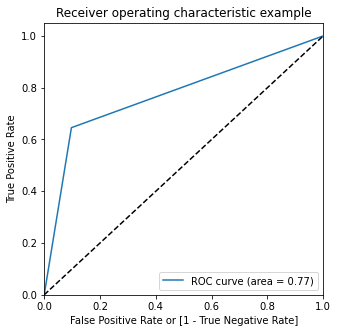

In [149]:
#Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [150]:
#Let us create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)

In [151]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2626,1,0.406673,2626,0,1,1,1,1,1,0,0,0,0,0
2973,0,0.116102,2973,0,1,1,0,0,0,0,0,0,0,0
5392,0,0.017648,5392,0,1,0,0,0,0,0,0,0,0,0
8344,0,0.045271,8344,0,1,0,0,0,0,0,0,0,0,0
1763,0,0.023594,1763,0,1,0,0,0,0,0,0,0,0,0


In [152]:
#Let us calculate accuracy, sensitivity and specificity at different cutoff levels
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.361161  1.000000  0.000000
0.1   0.1  0.605198  0.965993  0.401226
0.2   0.2  0.722321  0.908822  0.616885
0.3   0.3  0.796725  0.817151  0.785177
0.4   0.4  0.814347  0.771316  0.838674
0.5   0.5  0.809719  0.645638  0.902480
0.6   0.6  0.803489  0.584032  0.927556
0.7   0.7  0.791385  0.495811  0.958484
0.8   0.8  0.765931  0.389354  0.978824
0.9   0.9  0.732289  0.269098  0.994149


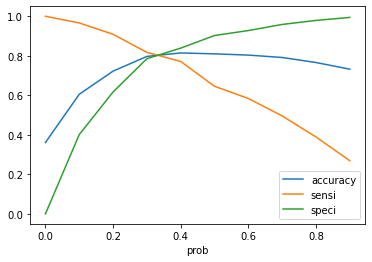

In [153]:
#As we can see there is always a tradeoff between sensitity and specificity and we need to find the optimum balance
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The above graph provides around 0.35 to be optimum cutoff

In [154]:
#Using 0.35 as the cutoff and updating the values
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
2626,1,0.406673,2626,0,1,1,1,1,1,0,0,0,0,0,1
2973,0,0.116102,2973,0,1,1,0,0,0,0,0,0,0,0,0
5392,0,0.017648,5392,0,1,0,0,0,0,0,0,0,0,0,0
8344,0,0.045271,8344,0,1,0,0,0,0,0,0,0,0,0,0
1763,0,0.023594,1763,0,1,0,0,0,0,0,0,0,0,0,0


<h4> Let us now evaluate the model again </h4>


In [155]:
#Accuracy
metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])

0.8113207547169812

We have around 81.1% accuracy, which was the goal given in the assignment

In [156]:
#Let us create the confusion matrix now
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])

In [157]:
confusion

array([[2942,  647],
       [ 413, 1616]])

In [158]:
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

In [159]:
TP = 1616
TN = 2942
FP = 647
FN = 413

In [160]:
Sensitivity = TP/float(TP+FN)

In [161]:
print(Sensitivity)

0.7964514539181863


In [162]:
Specificity = TN/float(TN+FP)

In [163]:
print(Specificity)

0.8197269434382837


We now have both Sensitivity and Specificity close to 80%, which is good.

In [164]:
#Precision and Recall
Precision = TP/float(TP+FP)
Recall = TP/float(TP+FN)

In [165]:
print(Precision)
print(Recall)

0.7140963323022537
0.7964514539181863


<h4> Making Predictions </h4>

In [166]:
#Scaling Total Visits, TimeSpent and Page Views per visit. As explained in lectures, we will just transform and not fit
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [167]:
#Assigning the finally selected columns by the model
rfe_cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Specialization_NA',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened'],
      dtype='object')

In [168]:
X_test = X_test[rfe_cols]

In [169]:
#Adding the constsnt
X_test_sm = sm.add_constant(X_test)

#Adding the probability values
y_test_pred = lr_model.predict(X_test_sm)

In [170]:
y_test_pred

2375    0.020798
5128    0.253015
2484    0.557113
2445    0.169696
4014    0.232412
          ...   
5571    0.993447
3204    0.636279
6018    0.300921
8407    0.045271
404     0.807680
Length: 2409, dtype: float64

In [171]:
#Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [172]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [173]:
#Putting Prospect ID as Index
y_test_df['Prospect ID'] = y_test_df.index

In [174]:
#Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [175]:
#Appending both dataframes
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [176]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2375,0.020798
1,0,5128,0.253015
2,1,2484,0.557113
3,0,2445,0.169696
4,1,4014,0.232412


In [177]:
#Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [178]:
#Adding the Predicted conversion based upon cutoff of 0.35
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [179]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,2375,0.020798,0
1,0,5128,0.253015,0
2,1,2484,0.557113,1
3,0,2445,0.169696,0
4,1,4014,0.232412,0


In [180]:
#Calculating the accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8107098381070984

In [181]:
#Creating the confusion matrix
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )

In [182]:
confusion

array([[1301,  254],
       [ 202,  652]])

In [183]:
TP = 796
TN = 1301
FP = 254
FN = 202

In [184]:
Sensitivity = TP/float(TP+FN)

In [185]:
Sensitivity

0.7975951903807615

In [186]:
Specificity = TN/float(TN+FP)

In [187]:
Specificity

0.8366559485530547

This looks quite close to what have in training data, hence our model is good for both test and train data

The last thing to perform is to assign a score to each entry. We will multiply the predicted probability by 100 to get the score

In [188]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [189]:
y_pred_final

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
0,0,2375,0.020798,0,2
1,0,5128,0.253015,0,25
2,1,2484,0.557113,1,56
3,0,2445,0.169696,0,17
4,1,4014,0.232412,0,23
...,...,...,...,...,...
2404,1,5571,0.993447,1,99
2405,1,3204,0.636279,1,64
2406,0,6018,0.300921,0,30
2407,0,8407,0.045271,0,5
